# POSTTEST 8 Deep Learning
# Nama  : ANDI NUR FADILAH
# NIM   : 2109106015
# Kelas : INFORMATIKA A 21

# Membuat Deep Learning Sederhana Menggunakan Sequential Model dengan Minimal Akurasi Training 70% dan Validation 70%.

## Mengimport Library yang Digunakan

In [26]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

## Memuat Data & Data Split

In [3]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = tfds.load("cifar10", batch_size = -1, split=['train+test', 'train[:70%]+test'], as_supervised = True)

## Pratinjau Gambar

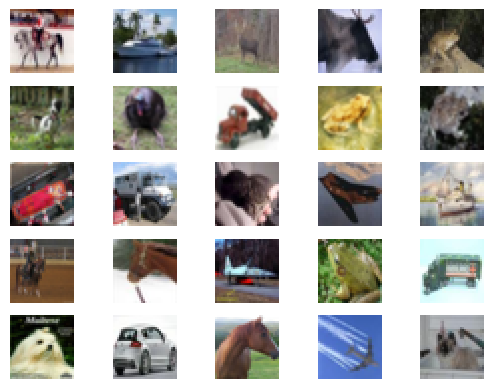

In [4]:
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [5]:
x_train_raw.shape

TensorShape([60000, 32, 32, 3])

In [6]:
x_test_raw.shape

TensorShape([45000, 32, 32, 3])

## Encoding Label pada Gambar

In [7]:
# ONE HOT ENCODING
y_train = tf.keras.utils.to_categorical(y_train_raw, 10)
y_test = tf.keras.utils.to_categorical(y_test_raw, 10)

## Resize Gambar pada Dataset

In [8]:
data_train = tf.image.resize(x_train_raw, (28, 28))
data_test  = tf.image.resize(x_test_raw, (28, 28))

## Reshape Gambar pada Dataset

In [9]:
data_train = np.reshape(data_train.numpy(), (60000, 2352))
data_test  = np.reshape(data_test.numpy(), (45000, 2352))

## Normalisasi piksel pada gambar

In [10]:
data_train = data_train.astype('float32')/255
data_test  = data_test.astype('float32')/255

## Membuat DNN (Deep Neural Network)

### Terdiri dari 3 layers dan 2 aktivasi RELU

In [11]:
model = Sequential(
    [
        Dense(512, activation = 'relu', input_dim = 2352),
        Dense(256, activation = 'relu'),
        Dense(10, activation = 'softmax'),
        
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1204736   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,338,634
Trainable params: 1,338,634
Non-trainable params: 0
_________________________________________________________________


### Optimasi Model

In [13]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Fitting Training Model

In [24]:
fit = model.fit(data_train, y_train, batch_size = 512, epochs = 20, validation_data = (data_test, y_test))
# batch_size : ukuran yang diambil di setiap epochsnya, biasanya defaultnya 32, intinya kelipatan 8

Epoch 1/20
118/118 [==============================] - 2s 21ms/step - loss: 0.4746 - accuracy: 0.8378 - val_loss: 0.4269 - val_accuracy: 0.8556
Epoch 2/20
118/118 [==============================] - 2s 21ms/step - loss: 0.4259 - accuracy: 0.8559 - val_loss: 0.4083 - val_accuracy: 0.8640
Epoch 3/20
118/118 [==============================] - 2s 21ms/step - loss: 0.4156 - accuracy: 0.8605 - val_loss: 0.4056 - val_accuracy: 0.8646
Epoch 4/20
118/118 [==============================] - 2s 21ms/step - loss: 0.4093 - accuracy: 0.8624 - val_loss: 0.4004 - val_accuracy: 0.8666
Epoch 5/20
118/118 [==============================] - 2s 21ms/step - loss: 0.4017 - accuracy: 0.8660 - val_loss: 0.3904 - val_accuracy: 0.8704
Epoch 6/20
118/118 [==============================] - 2s 21ms/step - loss: 0.3988 - accuracy: 0.8668 - val_loss: 0.3783 - val_accuracy: 0.8749
Epoch 7/20
118/118 [==============================] - 3s 22ms/step - loss: 0.3924 - accuracy: 0.8709 - val_loss: 0.3755 - val_accuracy: 0.8772

### Evaluasi Model yang telah dilatih (train)

In [25]:
score = model.evaluate(data_test, y_test)
print("TEST LOSS            : ", score[0])
print("TEST ACCURACY        : ", score[1])
print("VALIDATION LOSS      : ", fit.history['val_loss'][-1])
print("VALIDATION ACCURACY  : ", fit.history['val_accuracy'][-1])

1407/1407 [==============================] - 3s 2ms/step - loss: 0.3456 - accuracy: 0.8856
TEST LOSS            :  0.3455824851989746
TEST ACCURACY        :  0.8855999708175659
VALIDATION LOSS      :  0.3455823063850403
VALIDATION ACCURACY  :  0.8855999708175659
